#  1. 股票数据获取

### 1. 数据分析相关模块

In [135]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt

### 2. Tushare数据集介绍

1. tushare数据接口目前分成两块：    
&emsp;&emsp;|-普通版本:http://tushare.waditu.com/index.html       
&emsp;&emsp;|-专业版本:https://tushare.pro/document/2     

2. Tushare数据访问token      
&emsp;&emsp;专业数据访问需要token，这个防止其他分布式爬虫访问；      
&emsp;&emsp;获取专业版本的token是免费的，但有的需要积分，积分可以通过参与社区活动获取；     
&emsp;&emsp;token获取办法：只需要注册一个账号，在个人空间就可以自动生成token，然后在客户端就可以使用；

3. 访问Tushare数据集接口       
&emsp;&emsp;Tushare的数据接口在官网上就有直接介绍，也有很对例子。

### 3. Tushare数据访问

1.  交易数据介绍      

&emsp;&emsp;获取交易数据的地址：http://tushare.waditu.com/index.html   ，选择其中的【交易数据】-> 【历史行情】可以得到访问数据的方式。   
>交易类数据提供股票的交易行情数据，通过简单的接口调用可获取相应的DataFrame格式数据，主要包括以下类别：   
>1. 历史行情数据    
>2. 复权历史数据     
>3. 实时行情数据     
>4. 历史分笔数据     
>5. 实时报价数据     
>6. 当日历史分笔     
>7. 大盘指数列表      
>8. 大单交易数据      

&emsp;&emsp;获取个股历史交易数据（包括均线数据），可以通过参数设置获取日k线、周k线、月k线，以及5分钟、15分钟、30分钟和60分钟k线数据。本接口只能获取近3年的日线数据，适合搭配均线数据进行选股和分析，如果需要全部历史数据，请调用下一个接口get_h_data()。
&emsp;&emsp;     
参数说明：    

参数|参数说明
-|-
code|股票代码，即6位数字代码，或者指数代码（sh=上证指数 sz=深圳成指 hs300=沪深300指数 sz50=上证50 zxb=中小板 cyb=创业板）       
start|开始日期，格式YYYY-MM-DD       
end|结束日期，格式YYYY-MM-DD       
ktype|数据类型，D=日k线 W=周 M=月 5=5分钟 15=15分钟 30=30分钟 60=60分钟，默认为D       
retry_count|当网络异常后重试次数，默认为3       
pause|重试时停顿秒数，默认为0       
&emsp;&emsp;              
返回值说明：  

字段|字段说明
-|-
date|日期       
open|开盘价       
high|最高价       
close|收盘价       
low|最低价       
volume|成交量       
price_change|价格变动       
p_change|涨跌幅       
ma5|5日均价       
ma10|10日均价       
ma20|20日均价       
v_ma5|5日均量       
v_ma10|10日均量       
v_ma20|20日均量       
turnover|换手率\[注：指数无此项\]       


2. 获取交易数据

In [136]:
import tushare as ts
demo=ts.get_hist_data('600848') 

3. 获取企业基本信息 

In [137]:
import tushare as ts
industry=ts.get_stock_basics()
#print(industry)
#print(type(industry))
print(industry.shape)
#r1=industry.iloc[0:1,0:1]
#r2=r1.iloc[0:1,0:1]
print(industry.columns)
#print(industry['name'])
#print(industry.iloc[0:1])
print(industry.index)

(3573, 22)
Index(['name', 'industry', 'area', 'pe', 'outstanding', 'totals',
       'totalAssets', 'liquidAssets', 'fixedAssets', 'reserved',
       'reservedPerShare', 'esp', 'bvps', 'pb', 'timeToMarket', 'undp',
       'perundp', 'rev', 'profit', 'gpr', 'npr', 'holders'],
      dtype='object')
Index(['300165', '000068', '000981', '002721', '600086', '600290', '300153',
       '002560', '300360', '002927',
       ...
       '000693', '603629', '603185', '603121', '601860', '600680', '600401',
       '300756', '300755', '002948'],
      dtype='object', name='code', length=3573)


In [138]:
import tushare as ts
data=ts.get_hist_data('300165') 
print(data.columns)
print(data.index)

Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')
Index(['2018-12-18', '2018-12-17', '2018-12-14', '2018-12-13', '2018-12-12',
       '2018-12-11', '2018-12-10', '2018-12-07', '2018-12-06', '2018-12-05',
       ...
       '2016-07-01', '2016-06-30', '2016-06-29', '2016-06-28', '2016-06-27',
       '2016-06-24', '2016-06-23', '2016-06-22', '2016-06-21', '2016-06-20'],
      dtype='object', name='date', length=557)


# 2. 股票数据分析与处理

1. 时间的顺序

In [21]:
data.index=pd.to_datetime(data.index)
print(type(data.index))
data=data.sort_index()


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


2.时间数据缺失      
&emsp;&emsp;实际上因为各种因素，会导致时间缺失（比如法定假日）   
&emsp;&emsp;获取时间范围：   

In [140]:
lst=data.index.tolist()
print('第一天',lst[0])
print('近一天',lst[-1])
print(type(lst[-1]))
print('理论天数:',(lst[-1]-lst[0]).days)
print('实际天数:',data.shape[0])

第一天 2016-06-20 00:00:00
近一天 2018-12-18 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
理论天数: 911
实际天数: 557


2. 数据可视化分析

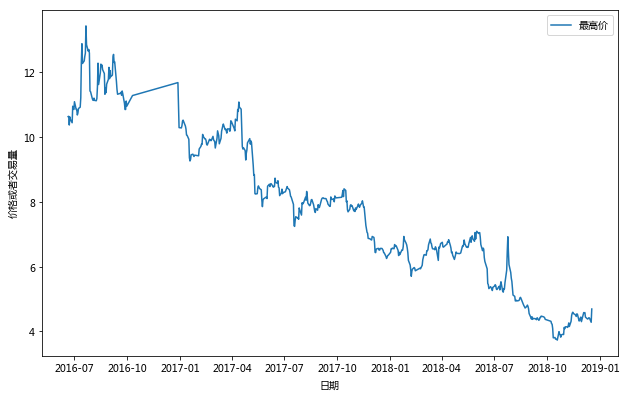

In [5]:
% matplotlib inline
import matplotlib.pyplot as plt

figure=plt.figure(figsize=(10,6))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='日期',ylabel='价格或者交易量')
#ax.plot(data['close'], label='收盘价')
#ax.plot(data['volume'], label='交易量')
ax.plot(data['high'], label='最高价')
#ax.plot(data[['ma20']], label='最高价')
plt.legend(loc=0)
plt.show()


# 3. 股票预测模型选择

三种模型：   
&emsp;&emsp;&emsp;&emsp;|-AR模型（AR模型称为自回归模型（Auto Regressive model））           
&emsp;&emsp;&emsp;&emsp;|-MA模型（MA模型称为移动平均模型（Moving Average model））     
&emsp;&emsp;&emsp;&emsp;|-ARMA模型（ARMA称为自回归移动平均模型（Auto Regressive and Moving Average model））    
&emsp;&emsp;&emsp;&emsp;|-ARIMA模型（ARIMA模型称为差分自回归移动平均模型）         
&emsp;&emsp;每个模型的统计量有   
&emsp;&emsp;&emsp;&emsp;|-均值    
&emsp;&emsp;&emsp;&emsp;|-方差     
&emsp;&emsp;&emsp;&emsp;|-ACF(拖尾)    
&emsp;&emsp;&emsp;&emsp;|-PACF(p阶截尾)   

我们选择**ARMA模型**

# 4. 股票预测实现  

1. 平稳性分析   

In [6]:
from statsmodels.tsa.stattools import adfuller as ADF
diff = 0
adf = ADF(data['high'])
print('可信概率:',adf[1])
for i in range(10):
    diff = diff + 1
    adf = ADF(data['high'].diff(diff).dropna())
    print(adf[1])

可信概率: 0.8154614460777652
1.945095480758083e-15
4.6423908932375695e-08
7.985366417571043e-08
1.1473672115845637e-10
2.991070438405806e-10
1.0166221542669001e-06
8.357939135455544e-08
6.086384060060486e-07
2.468533631788921e-05
4.0333181569308555e-08


2. 预测实现

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


557


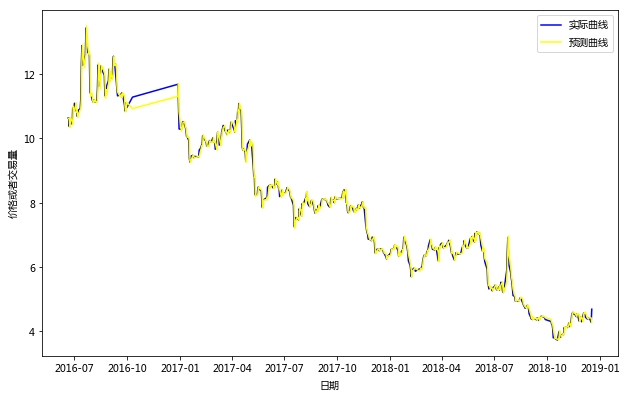

In [49]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import * 
import time


data=ts.get_hist_data('300165') 
#print(data.columns)
#print(data.index)
data.index=pd.to_datetime(data.index)
data=data.sort_index()

arma = tsa.ARMA(data[['high']], (1, 1))
model=arma.fit(disp=True, method='mle')


# 第一天 2016-06-20 00:00:00
# 近一天 2018-12-18 00:00:00
print(data.shape[0])
predict=model.predict(1,556)



figure=plt.figure(figsize=(10,6))
ax=figure.add_axes([0.1,0.1,0.8,0.8],xlabel='日期',ylabel='价格或者交易量')

#ax.plot(model.fittedvalues, color='r', label='训练曲线')
ax.plot(data[['high']], color='b',label='实际曲线')
ax.plot(predict, color=(1,1,0,1),label='预测曲线')

plt.legend()
plt.show()
